<a href="https://colab.research.google.com/github/dimpo440/dimpo440/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%82%D0%B8%D0%BF%D0%B0_%D1%82%D0%BE%D0%B2%D0%B0%D1%80%D0%B0_%D0%BF%D0%BE_%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D1%8E_%D0%B8_%D1%84%D0%BE%D1%82%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import requests
from io import BytesIO
import re
import matplotlib.pyplot as plt
# !pip install aiohttp
# import asyncio
# !pip install aiofiles
# !pip install nest_asyncio

In [ ]:
import nest_asyncio
import aiohttp
import aiofiles
nest_asyncio.apply()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
import pickle
import time

# Загрузка csv и обработка

## Загрузка

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/blackcatshop/Товары.xlsx")

## Просмотр

In [ ]:
data.describe()

,Название товара,Полное описание,Изображения,Артикул,Параметр: Тип товара
count,12261,10714,10297,12261,8896
unique,12207,7285,10297,12261,44
top,"Anju Beaute - Шампунь ""Текстурный"" для объема:...",0,https://static.insales-cdn.com/images/products...,24112,Корм
freq,4,310,1,1,4756


In [ ]:
data

,Название товара,Полное описание,Изображения,Артикул,Параметр: Тип товара
0,"1st Choice - ""Здоровая кожа и шерсть"" 2,72 кг",<p>Формула 1st CHOICE HEALTHY SKIN &amp; COAT&...,https://static.insales-cdn.com/images/products...,24112,Корм
1,"1st Choice - ""Здоровая кожа и шерсть"" 5,44 кг",<p>Формула 1st CHOICE HEALTHY SKIN &amp; COAT&...,https://static.insales-cdn.com/images/products...,23628,Корм
2,"1st Choice - Для домашних кошек с цыпленком 0,...",<p>1st CHOICE VITALITY INDOOR&nbsp;- идеальная...,https://static.insales-cdn.com/images/products...,23515,Корм
3,"1st Choice - Для домашних кошек с цыпленком 2,...",<p>1st CHOICE VITALITY INDOOR&nbsp;- идеальная...,https://static.insales-cdn.com/images/products...,24115,Корм
4,"1st Choice - Для домашних кошек с цыпленком 5,...",<p>1st CHOICE VITALITY INDOOR&nbsp;- идеальная...,https://static.insales-cdn.com/images/products...,20097,Корм
...,...,...,...,...,...
12256,Родные корма - Сухой корм для взрослых собак с...,"<div><strong>Сухой корм для собак ""Родные корм...",https://static.insales-cdn.com/images/products...,49315,NaN
12257,Родные корма - Сухой корм для взрослых собак с...,"<div><strong>Сухой корм для собак ""Родные корм...",https://static.insales-cdn.com/images/products...,34301,NaN
12258,Родные корма - Сухой корм для взрослых стерили...,"<div><strong>Сухой корм для кошек ""Родные корм...",https://static.insales-cdn.com/images/products...,34280,NaN
12259,Родные корма - Сухой корм для взрослых стерили...,"<div><strong>Сухой корм для кошек ""Родные корм...",https://static.insales-cdn.com/images/products...,34285,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Название товара       12261 non-null  object
 1   Полное описание       10714 non-null  object
 2   Изображения           10297 non-null  object
 3   Артикул               12261 non-null  object
 4   Параметр: Тип товара  8896 non-null   object
dtypes: object(5)
memory usage: 479.1+ KB


In [ ]:
data['Параметр: Тип товара'].unique()

array(['Корм', 'Наполнители', 'Переноска', 'Прочее (транспортировка)',
       'Автокормушка', 'Автопоилка', 'Пеленки', 'Фильтры для туалета',
       'Коврик для туалета', 'Пакеты для туалета', 'Лотки', nan,
       'Совочек для туалета', 'Контейнер', 'Миска', 'Лежанка',
       'Когтеточки', 'Закрытые туалеты', 'Шампунь', 'Прочая косметика',
       'Кондиционер', 'Домик', 'Игрушки', 'Лакомства', 'Витамины',
       'Сумка', 'Ошейники', 'Шлейки', 'Намордники', 'Когтерез', 'Клетка',
       'Пакеты для прогулки', 'Адресники', 'Поводки', 'Удавка',
       'Прочее (амуниция)', 'Вольер', 'Фурминатор/Дешеддер',
       'Защитный воротник', 'Антибиотики', 'Прочее (ветаптека)',
       'Рулетки', 'Ринговка', 'Кормушка', 'Прочее'], dtype=object)

In [ ]:
data['Параметр: Тип товара'] = data['Параметр: Тип товара'].astype("string")
data['Название товара'] = data['Название товара'].astype("string")
data['Полное описание'] = data['Полное описание'].astype("string")
data['Изображения'] = data['Изображения'].astype("string")
data['Артикул'] = data['Артикул'].astype("string")


In [ ]:
prod_type = data['Параметр: Тип товара']

In [ ]:
prod_type.unique()

<StringArray>
[                    'Корм',              'Наполнители',
                'Переноска', 'Прочее (транспортировка)',
             'Автокормушка',               'Автопоилка',
                  'Пеленки',      'Фильтры для туалета',
       'Коврик для туалета',       'Пакеты для туалета',
                    'Лотки',                       <NA>,
      'Совочек для туалета',                'Контейнер',
                    'Миска',                  'Лежанка',
               'Когтеточки',         'Закрытые туалеты',
                  'Шампунь',         'Прочая косметика',
              'Кондиционер',                    'Домик',
                  'Игрушки',                'Лакомства',
                 'Витамины',                    'Сумка',
                 'Ошейники',                   'Шлейки',
               'Намордники',                 'Когтерез',
                   'Клетка',      'Пакеты для прогулки',
                'Адресники',                  'Поводки',
                 

In [ ]:
prod_type.value_counts()

Корм                        4756
Лакомства                    609
Игрушки                      602
Наполнители                  406
Ошейники                     270
Шлейки                       245
Поводки                      234
Шампунь                      211
Лежанка                      183
Миска                        170
Витамины                     146
Прочая косметика             144
Рулетки                      141
Пеленки                       88
Кондиционер                   78
Домик                         72
Клетка                        69
Когтеточки                    64
Лотки                         48
Удавка                        45
Фурминатор/Дешеддер           42
Намордники                    40
Адресники                     36
Закрытые туалеты              33
Переноска                     32
Контейнер                     22
Совочек для туалета           19
Сумка                         12
Прочее (ветаптека)            12
Вольер                        11
Автопоилка

Для обучения отбираем только те строки, где тип товара встречается не менее 140 раз. Верхняя граница отбора по количеству 1,5 раза (210 примеров)

## Разделение на размеченную и неразмеченную часть

Метки находятся в поле 'Параметр: Тип товара'

In [ ]:
from numpy import where
data_labeled = data.dropna()
data_labeled["Параметр: Тип товара"].value_counts()

Корм                        4624
Лакомства                    553
Игрушки                      490
Наполнители                  368
Шампунь                      201
Лежанка                      178
Миска                        161
Ошейники                     157
Витамины                     140
Рулетки                      136
Прочая косметика             133
Шлейки                       126
Пеленки                       87
Кондиционер                   77
Клетка                        68
Домик                         61
Когтеточки                    46
Адресники                     36
Лотки                         32
Фурминатор/Дешеддер           31
Поводки                       31
Намордники                    30
Закрытые туалеты              26
Переноска                     23
Совочек для туалета           16
Контейнер                     15
Прочее (ветаптека)            10
Вольер                        10
Автопоилка                     8
Прочее (транспортировка)       6
Сумка     

In [ ]:
data_not_labeled = data.where(data['Название товара'].notna() & data['Параметр: Тип товара'].isna())
#data_not = data_not_labeled.where(data_not_labeled['Название товара'].notna())
display(data_not_labeled)
data_not_labeled = data_not_labeled.dropna(thresh=4)
display(data_not_labeled)

,Название товара,Полное описание,Изображения,Артикул,Параметр: Тип товара
0,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...
12256,Родные корма - Сухой корм для взрослых собак с...,"<div><strong>Сухой корм для собак ""Родные корм...",https://static.insales-cdn.com/images/products...,49315,<NA>
12257,Родные корма - Сухой корм для взрослых собак с...,"<div><strong>Сухой корм для собак ""Родные корм...",https://static.insales-cdn.com/images/products...,34301,<NA>
12258,Родные корма - Сухой корм для взрослых стерили...,"<div><strong>Сухой корм для кошек ""Родные корм...",https://static.insales-cdn.com/images/products...,34280,<NA>
12259,Родные корма - Сухой корм для взрослых стерили...,"<div><strong>Сухой корм для кошек ""Родные корм...",https://static.insales-cdn.com/images/products...,34285,<NA>


,Название товара,Полное описание,Изображения,Артикул,Параметр: Тип товара
304,"Stefanplast - Устройство для сбора фекалий, Qu...","<p><span>Всем&nbsp;&nbsp;известно,&nbsp;&nbsp;...",https://static.insales-cdn.com/images/products...,12973,<NA>
369,"Рукавица для удаления шерсти животных, Cat Fut...",<p><strong>Pet Head</strong><span>&nbsp;&ndash...,https://static.insales-cdn.com/images/products...,10726,<NA>
1050,Астрафарм - КонтрСекс Neo Капли для котов и ко...,<div>Препараты КонтрСекс Neo предназначены для...,https://static.insales-cdn.com/images/products...,19214,<NA>
1051,Астрафарм - КонтрСекс Neo Капли для кошек и су...,<div>Препараты КонтрСекс Neo предназначены для...,https://static.insales-cdn.com/images/products...,19215,<NA>
1052,"Астрафарм - Секс барьер капли для кошечек, 2 м...",<p><span>Бигормональное контрацептивное средст...,https://static.insales-cdn.com/images/products...,26126,<NA>
...,...,...,...,...,...
12256,Родные корма - Сухой корм для взрослых собак с...,"<div><strong>Сухой корм для собак ""Родные корм...",https://static.insales-cdn.com/images/products...,49315,<NA>
12257,Родные корма - Сухой корм для взрослых собак с...,"<div><strong>Сухой корм для собак ""Родные корм...",https://static.insales-cdn.com/images/products...,34301,<NA>
12258,Родные корма - Сухой корм для взрослых стерили...,"<div><strong>Сухой корм для кошек ""Родные корм...",https://static.insales-cdn.com/images/products...,34280,<NA>
12259,Родные корма - Сухой корм для взрослых стерили...,"<div><strong>Сухой корм для кошек ""Родные корм...",https://static.insales-cdn.com/images/products...,34285,<NA>


## Формирование датасета

### Обработка текстового поля

In [ ]:
def clean_string(inp_str: str):
  rx = re.compile('[^а-яА-Я]+')
  result = rx.sub(' ', inp_str).strip().lower()
  return result

In [ ]:
clean_string(data_labeled.iloc[5,1])

'формула контроль веса специально разработана для стерилизованных и кастрированных животных а также склонных к полноте низкокалорийный корм поддерживает идеальную форму у кастрированных и стерилизованных кошек более низкая потребность в калориях низкое содержание жира в корме способствует снижению массы тела без сокращения нормы кормления снижение уровня активности кошки с возрастом может способствовать набору лишнего веса эта формула удобна во всех случаях когда необходимо ограничить количество калорий в рационе идеальная форма система вывода шерсти из жкт низкокалорийный поддерживает идеальную форму рн контроль мочи снижает риск образования камней в мочевыделительной системе клетчатка обеспечивает ощущение сытости и улучшает пищеварение состав ингредиенты свежая курица мука из мяса курицы рис гороховый протеин коричневый рис специально обработанные ядра ячменя и овса мякоть свеклы клетчатка гороха гидролизат куриной печени куриный жир сохраненный смесью натуральных токоферолов витами

### Обработка лейблов

In [ ]:
cats = dict(data_labeled["Параметр: Тип товара"].value_counts())

In [ ]:
cats

{'Автокормушка': 5,
 'Автопоилка': 8,
 'Адресники': 36,
 'Антибиотики': 3,
 'Витамины': 140,
 'Вольер': 10,
 'Домик': 61,
 'Закрытые туалеты': 26,
 'Защитный воротник': 2,
 'Игрушки': 490,
 'Клетка': 68,
 'Коврик для туалета': 3,
 'Когтерез': 5,
 'Когтеточки': 46,
 'Кондиционер': 77,
 'Контейнер': 15,
 'Корм': 4624,
 'Кормушка': 2,
 'Лакомства': 553,
 'Лежанка': 178,
 'Лотки': 32,
 'Миска': 161,
 'Намордники': 30,
 'Наполнители': 368,
 'Ошейники': 157,
 'Пакеты для прогулки': 5,
 'Пакеты для туалета': 2,
 'Пеленки': 87,
 'Переноска': 23,
 'Поводки': 31,
 'Прочая косметика': 133,
 'Прочее (ветаптека)': 10,
 'Прочее (транспортировка)': 6,
 'Ринговка': 1,
 'Рулетки': 136,
 'Совочек для туалета': 16,
 'Сумка': 6,
 'Фильтры для туалета': 4,
 'Фурминатор/Дешеддер': 31,
 'Шампунь': 201,
 'Шлейки': 126}

In [ ]:
def get_categories(cats: dict, min_count: int):
  categories = []
  for cat, count in cats.items():
    if count > min_count:
      categories.append(cat)
  return categories

In [ ]:
get_categories(cats, 125)

['Корм',
 'Лакомства',
 'Игрушки',
 'Наполнители',
 'Шампунь',
 'Лежанка',
 'Миска',
 'Ошейники',
 'Витамины',
 'Рулетки',
 'Прочая косметика',
 'Шлейки']

In [ ]:
def make_category_dicts(categories):
  cat_nums = dict()
  cat_keys = dict()
  i = 0
  for label in categories:
    cat_keys[label] = i
    cat_nums[i] = label
    i += 1
  return cat_nums, cat_keys

### Обработка картинки

In [ ]:
def load_img(img_url: str, size:tuple=(300, 300)):
  response = requests.get(img_url)
  img = Image.open(BytesIO(response.content))
  return np.asarray(img.resize(size))

In [ ]:
def array_img(pic, size:tuple=(300, 300)):
#  await asyncio.sleep(random.random())
  img = Image.open(pic)
  return np.asarray(img.resize(size))

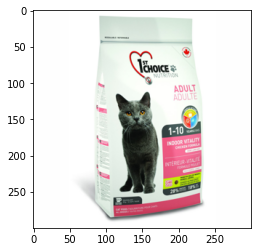

In [ ]:
img_url = data_labeled.iloc[4,2]
size = (300, 300)
plt.imshow(load_img(img_url, size))

### Датасет

In [ ]:
loading = False

In [ ]:
pic_dir = "/content/drive/MyDrive/blackcatshop/"

In [ ]:
# размер к которому приводятся картинки товаров
img_size = (300, 300)
# сколько слов берётся от описания товара
text_size = 40
# порог количества товаров в категории для вхождения в датасет
min_count = 125
max_count = round(min_count * 1.5)
# Номера колонок с данными в файле
description_column = 1
img_column = 2
num_column = 3
category_column = 4
# Количество отобранных слов из описания
desc_len = 40
VOCAB_SIZE = 5000

In [ ]:
max_count

188

In [ ]:
label_dict, cats_dict = make_category_dicts(get_categories(cats, min_count))

In [ ]:
cats_dict

{'Витамины': 8,
 'Игрушки': 2,
 'Корм': 0,
 'Лакомства': 1,
 'Лежанка': 5,
 'Миска': 6,
 'Наполнители': 3,
 'Ошейники': 7,
 'Прочая косметика': 10,
 'Рулетки': 9,
 'Шампунь': 4,
 'Шлейки': 11}

In [ ]:
data_labeled[data_labeled.index==2050].iloc[0,img_column]

'https://static.insales-cdn.com/images/products/1/5061/179327941/315174_1600x1600.jpg'

In [ ]:
dataset_prepare = []
cat_counter = np.zeros(len(cats_dict))
categories = get_categories(cats, min_count)
for i in data_labeled.index:
  data_raw = data_labeled[data_labeled.index == i]
  if data_raw.iloc[0,category_column] in categories:
    if cat_counter[cats_dict[data_raw.iloc[0,category_column]]] < max_count:
      data_row = [data_raw.iloc[0,num_column],  # артикул
                  data_raw.iloc[0,img_column],  # ссылка на картинку
                  clean_string(data_raw.iloc[0,description_column]),  # очищенная строка описания
                  cats_dict[data_raw.iloc[0,category_column]]]  # номер категории
      dataset_prepare.append(data_row)
      cat_counter[cats_dict[data_raw.iloc[0,category_column]]] += 1

In [ ]:
cat_counter

array([188., 188., 188., 188., 188., 178., 161., 157., 140., 136., 133.,
       126.])

In [ ]:
dataset_prepare[4][1]

'https://static.insales-cdn.com/images/products/1/5262/132969614/1st-choice-home-cats-chicken.jpg'

### Попытка Asyncio загрузки

In [ ]:
'''
def insert_pic_data(i, pic_data, data_row):
  data_row[1] = array_img(pic_data, img_size)
#  await asyncio.sleep(random.random())
  return data_row

async def load_pic(session, data_row, i):
  await asyncio.sleep(random.random())
  async with session.get(data_row[1]) as response:
    if response.status == 200:
      img_loading = await response.read()
      return insert_pic_data(i, img_loading, data_row)
    else:
      print(url)

In [ ]:
'''
dataset = dataset_prepare[0:5].copy()
data_set = []
# formated_data = []
# for i in data_labeled.index:
#  img_url = data_labeled.iloc[i,img_column]
#  formated_data = [load_img(img_url, img_size)] + [clean_string(data_labeled.iloc[i,description_column])]
async def make_dataset():
  tasks = []
  async with aiohttp.ClientSession() as session:
    for i, data_row in enumerate(dataset):
      tasks.append(load_pic(session, data_row.copy(), i))
    data_set = await asyncio.gather(*tasks)
    print(data_set)
loop = asyncio.get_event_loop()
loop.run_until_complete(make_dataset())

### Загрузка фоток

In [ ]:
data_set = []

In [ ]:
if loading:
  for i, data_row in enumerate(dataset_prepare):
    try_num = 0
    if i >= len(data_set):
      data_set.append(data_row)
    while type(data_set[i][1]) == str or data_set[i][1].shape :
      try:
        data_set[i][1] = load_img(data_row[1].split()[0], img_size)
      except:
        try_num += 1
        if try_num > 4:
          break
        time.sleep(try_num)

In [ ]:
print(load_img(dataset_prepare[1][1].split()[0], img_size).shape)
plt.imshow(load_img(dataset_prepare[1][120].split()[0], img_size)[:,:,:3])

(300, 300, 4)


IndexError: ignored

In [ ]:
if loading:
  with open(pic_dir+'data.pickle', 'wb') as f:
    pickle.dump(data_set, f)

In [ ]:
if not loading:
  with open(pic_dir+'data.pickle', 'rb') as f:
    data_set = pickle.load(f)

In [ ]:
full_data = np.array(data_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
full_data[:-1,:].shape

(1970, 4)

# Нейросеть

In [ ]:
from sklearn.model_selection import train_test_split

## Выборки

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(full_data[:,1:3], full_data[:,3], test_size=0.1)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(cats_dict))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(cats_dict))

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE)

In [ ]:
tokenizer.fit_on_texts(x_train[:,1])

In [ ]:
x_train[:,1] = tokenizer.texts_to_sequences(x_train[:,1])

In [ ]:
x_test[:,1] = tokenizer.texts_to_sequences(x_test[:,1])

In [ ]:
x_train[2,1][:5] # = tf.keras.preprocessing.sequence.pad_sequences(x_train[:,1], maxlen=desc_len, padding="post")

[1926, 1322, 403, 35, 56]

In [ ]:
for seq in x_train[:,1]:
  while len(seq) < desc_len:
    seq.append(0)

In [ ]:
x_train_desc = tokenizer.sequences_to_matrix([x_train[:,1][0]])
for seq in x_train[:,1][1:]:
  x_train_desc = np.vstack((x_train_desc, tokenizer.sequences_to_matrix([seq[:desc_len]])))
x_train_desc.shape

(1773, 5000)

In [ ]:
for seq in x_test[:,1]:
  while len(seq) < desc_len:
    seq.append(0)

In [ ]:
x_test_desc = tokenizer.sequences_to_matrix([x_test[:,1][0]])
for seq in x_test[:,1][1:]:
  x_test_desc = np.vstack((x_test_desc, tokenizer.sequences_to_matrix([seq[:desc_len]])))
x_test_desc.shape

(198, 5000)

In [ ]:
x_train_pic = np.asarray(x_train[:,0])

In [ ]:
x_train_pic = np.expand_dims(x_train[:,0][0][:,:,:3], axis=0)
for i, pic in enumerate(x_train[:,0][1:]):
  try:
    x_train_pic = np.vstack((x_train_pic, np.expand_dims(pic[:,:,:3], axis=0)))
  except:
    print(i+1, pic.shape)
    temp_img = Image.fromarray(pic)
    temp_img = temp_img.convert(mode='RGB')
    print(np.asarray(temp_img).shape)
    x_train_pic = np.vstack((x_train_pic, np.expand_dims(np.asarray(temp_img), axis=0)))
x_train_pic.shape

30 (300, 300)
(300, 300, 3)
293 (300, 300)
(300, 300, 3)
396 (300, 300)
(300, 300, 3)
853 (300, 300)
(300, 300, 3)
976 (300, 300)
(300, 300, 3)
1044 (300, 300)
(300, 300, 3)
1144 (300, 300)
(300, 300, 3)
1282 (300, 300)
(300, 300, 3)
1325 (300, 300)
(300, 300, 3)
1676 (300, 300)
(300, 300, 3)


(1773, 300, 300, 3)

In [ ]:
x_test_pic = np.expand_dims(x_test[:,0][0][:,:,:3], axis=0)
for i, pic in enumerate(x_test[:,0][1:]):
  try:
    x_test_pic = np.vstack((x_test_pic, np.expand_dims(pic[:,:,:3], axis=0)))
  except:
    print(i+1, pic.shape)
    temp_img = Image.fromarray(pic)
    temp_img = temp_img.convert(mode='RGB')
    print(np.asarray(temp_img).shape)
    x_test_pic = np.vstack((x_test_pic, np.expand_dims(np.asarray(temp_img), axis=0)))
x_test_pic.shape

179 (300, 300)
(300, 300, 3)


(198, 300, 300, 3)

In [ ]:
 if loading:
  with open(pic_dir+'train.pickle', 'wb') as f:
    pickle.dump([x_train_pic, x_train_desc, y_train], f)
  with open(pic_dir+'test.pickle', 'wb') as f:
    pickle.dump([x_test_pic, x_test_desc, y_test], f)

In [ ]:
if not loading:
  with open(pic_dir+'train.pickle', 'rb') as f:
    x_train_pic, x_train_desc, y_train = pickle.load(f)
  with open(pic_dir+'test.pickle', 'rb') as f:
    x_test_pic, x_test_desc, y_test = pickle.load(f)

## Архитектура

In [ ]:
batch_size = 64

In [ ]:
x_train[:,0][1].shape

(300, 300, 3)

In [ ]:
input_1 = tf.keras.layers.Input(x_train[:,0][1].shape)
x = tf.keras.layers.Normalization() (input_1)
x = tf.keras.layers.Conv2D(16, (5,5), activation='relu', padding = 'same') (x)
x = tf.keras.layers.Conv2D(16, (5,5), activation='relu', padding = 'same') (x)
x = tf.keras.layers.MaxPooling2D(pool_size = (5,5)) (x)
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding = 'same') (x)
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding = 'same') (x)
x = tf.keras.layers.MaxPooling2D(pool_size = (3,3)) (x)
x = tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding = 'same') (x)
x = tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding = 'same') (x)
x = tf.keras.layers.MaxPooling2D(pool_size = (4,4)) (x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation="relu") (x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(len(cats_dict), activation="relu") (x)

input_2 = tf.keras.layers.Input((VOCAB_SIZE))
x1 = tf.keras.layers.Dense(8*desc_len, activation="relu") (input_2)
x1 = tf.keras.layers.Dropout(0.6)(x1)
x1 = tf.keras.layers.Dense(4*desc_len, activation="relu") (x1)
x1 = tf.keras.layers.Dropout(0.6)(x1)
x1 = tf.keras.layers.Dense(desc_len, activation="relu") (x1)

y = tf.keras.layers.concatenate([x, x1])
output = tf.keras.layers.Dense(len(cats_dict), activation="softmax") (y)

model = tf.keras.Model(inputs=[input_1, input_2], outputs=output)

In [ ]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 normalization_11 (Normalizatio  (None, 300, 300, 3)  7          ['input_23[0][0]']               
 n)                                                                                               
                                                                                                  
 conv2d_36 (Conv2D)             (None, 300, 300, 16  1216        ['normalization_11[0][0]']       
                                )                                                          

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics="accuracy")

## Обучение

In [ ]:
model.fit([x_train_pic, x_train_desc],
          y_train,
          epochs=10,
          batch_size=32,
          validation_data=([x_test_pic, x_test_desc],
                           y_test)
          )

Epoch 1/10
56/56 [==============================] - 18s 295ms/step - loss: 2.4834 - accuracy: 0.2352 - val_loss: 1.6064 - val_accuracy: 0.8030
Epoch 2/10
56/56 [==============================] - 16s 290ms/step - loss: 1.0258 - accuracy: 0.7259 - val_loss: 0.2496 - val_accuracy: 0.9293
Epoch 3/10
56/56 [==============================] - 16s 290ms/step - loss: 0.3327 - accuracy: 0.9030 - val_loss: 0.1471 - val_accuracy: 0.9444
Epoch 4/10
56/56 [==============================] - 16s 290ms/step - loss: 0.1834 - accuracy: 0.9566 - val_loss: 0.1210 - val_accuracy: 0.9596
Epoch 5/10
56/56 [==============================] - 16s 289ms/step - loss: 0.1150 - accuracy: 0.9695 - val_loss: 0.1555 - val_accuracy: 0.9495
Epoch 6/10
56/56 [==============================] - 16s 290ms/step - loss: 0.1095 - accuracy: 0.9695 - val_loss: 0.1495 - val_accuracy: 0.9596
Epoch 7/10
56/56 [==============================] - 16s 290ms/step - loss: 0.0745 - accuracy: 0.9803 - val_loss: 0.1222 - val_accuracy: 0.9596

# Применение

In [ ]:
def make_seq_pic_from_df(df, good_id):
  url = df.iloc[good_id,img_column].split()[0]
  pic = load_img(url)
  if pic.shape != (300,300,3):
    temp_img = Image.fromarray(pic)
    temp_img = temp_img.convert(mode='RGB')
    pic = np.asarray(temp_img)
  return np.expand_dims(pic, axis=0)

In [ ]:
def make_seq_desc_from_df(df, good_id):
  desc = clean_string(df.iloc[good_id,description_column])
  token_seq = tokenizer.texts_to_sequences([desc])
  while len(token_seq[0]) < desc_len:
    token_seq[0].append(0)
  seq = tokenizer.sequences_to_matrix(token_seq[:desc_len])
  return seq

In [ ]:
def make_input(df, good_id):
  return [make_seq_pic_from_df(df, good_id), make_seq_desc_from_df(df, good_id)]

In [ ]:
def good_info(df, good_id):
  print("Название:")
  print(df.iloc[good_id,0])
  print("Описание:")
  print(clean_string(df.iloc[good_id,description_column]))
  plt.imshow(load_img(df.iloc[good_id,img_column].split()[0]))

In [ ]:
def make_prediction(model, df, good_id):
  prediction = model.predict(make_input(df, good_id))
  prediction_label = np.argmax(prediction)
  return label_dict[prediction_label]

Apicenna (Апи-Сан) - Умный Спрей защита мест НЕ предназначенных  для туалета кошек
умный спрей защита мест не предназначенных для туалета кошек создан для того чтобы изменить привычку животного справлять нужду в неположенных местах легко справится с поставленной задачей подойдет для любых поверхностей сохранит домашний уют и здоровье всей семьи безопасен для людей и животных по карману любому владельцу домашнего животного имеет яркую оригинальную упаковку применение распылить с расстояния см на поверхности вызывающие предполагаемый или постоянный интерес животного применять раза в день до достижения эффекта для того чтобы изменить привычку животного справлять нужду в неположенных местах нужно предоставить ему место для справления естественных надобностей которое следует содержать в чистоте заметив признаки беспокойства связанные со справлением естественных нужд следует перенести питомца на место запланированное под туалет получится не сразу но когда животное справит нужду в положенном 

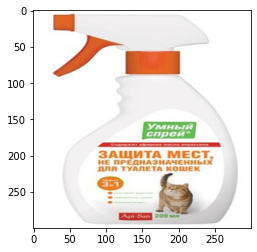

In [ ]:
good_id = random.randint(0, data_not_labeled.shape[0]-1)
good_info(data_not_labeled, good_id)


In [ ]:
make_prediction(model, data_not_labeled, good_id)

'Прочая косметика'

In [ ]:
label_dict

{0: 'Корм',
 1: 'Лакомства',
 2: 'Игрушки',
 3: 'Наполнители',
 4: 'Шампунь',
 5: 'Лежанка',
 6: 'Миска',
 7: 'Ошейники',
 8: 'Витамины',
 9: 'Рулетки',
 10: 'Прочая косметика',
 11: 'Шлейки'}

## New Section

TiTBiT Мур - Паштет для кошек Мясное ассорти с курицей - 0,065 кг
влажный корм мур больше чем мягкий и нежный мясной паштет это начало крепкой дружбы с ласковым домашним питомцем ваш гурман обязательно оценит изысканный вкус блюда и скажет мур р р в благодарность особый формат упаковки в виде тарелочки г удобен тем что содержит порцию оптимального размера которую не нужно убирать в холодильник упаковка легко сминается и превращается в блин высотой до мм который удобно утилизировать оптимальная порция для вашего питомца безопасная упаковка высокое содержание животного белка источник незаменимых аминокислот натуральное мясо без сои и консервантов содержит таурин и рыбий жир состав мясо и мясные субпродукты в том числе мясо курицы рыбий жир желеобразователь вода пищевая ценность протеин г жиры г зола г влага г ккал условия хранения хранить при температуре от с до с и относительной влажности не более после вскрытия банки хранить в холодильнике не более суток


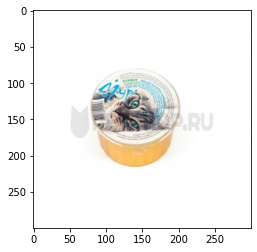

In [ ]:
good_id = random.randint(0, data_labeled.shape[0]-1)
good_info(data_labeled, good_id)


In [ ]:
make_prediction(model, data_labeled, good_id)

'Лакомства'